# Chapter 3. Chebyshev Polynomials and Series
There are three important (somehow analogous) settings that help us to approximate functions:
- Chebyshev
- Laurent
- Fourier
The book focuses on the most relevant for numerical analysis and approximation theory, namely _Chebyshev's approach_.
Ocasionally also making use of the tools from complex analysis using _Laurent's approach_.

In fact, we have before made some analysis that brought the connections between the three, namely obtaining the Chebyshev points.

## Chebyshev polynomials
The $k$th _Chebyshev polynnomial_ can be defined as the real pasrt of the function $z^k$ on the unit circle, i.e:
$$
x = \frac{1}{2} (z + z^{-1}) = \cos \theta,\quad\theta = \cos^{-1} x,
$$
$$
T_k(x) = \frac{1}{2}(z^k + z^{-k}) = \cos (k \theta).
$$
This is quite clear to see when we realize the _Chebyshev points_ are the real part of the roots of unity.

Here let's look at the polynomials
$T_1,...,T_6$
as defined in equation (3.8)

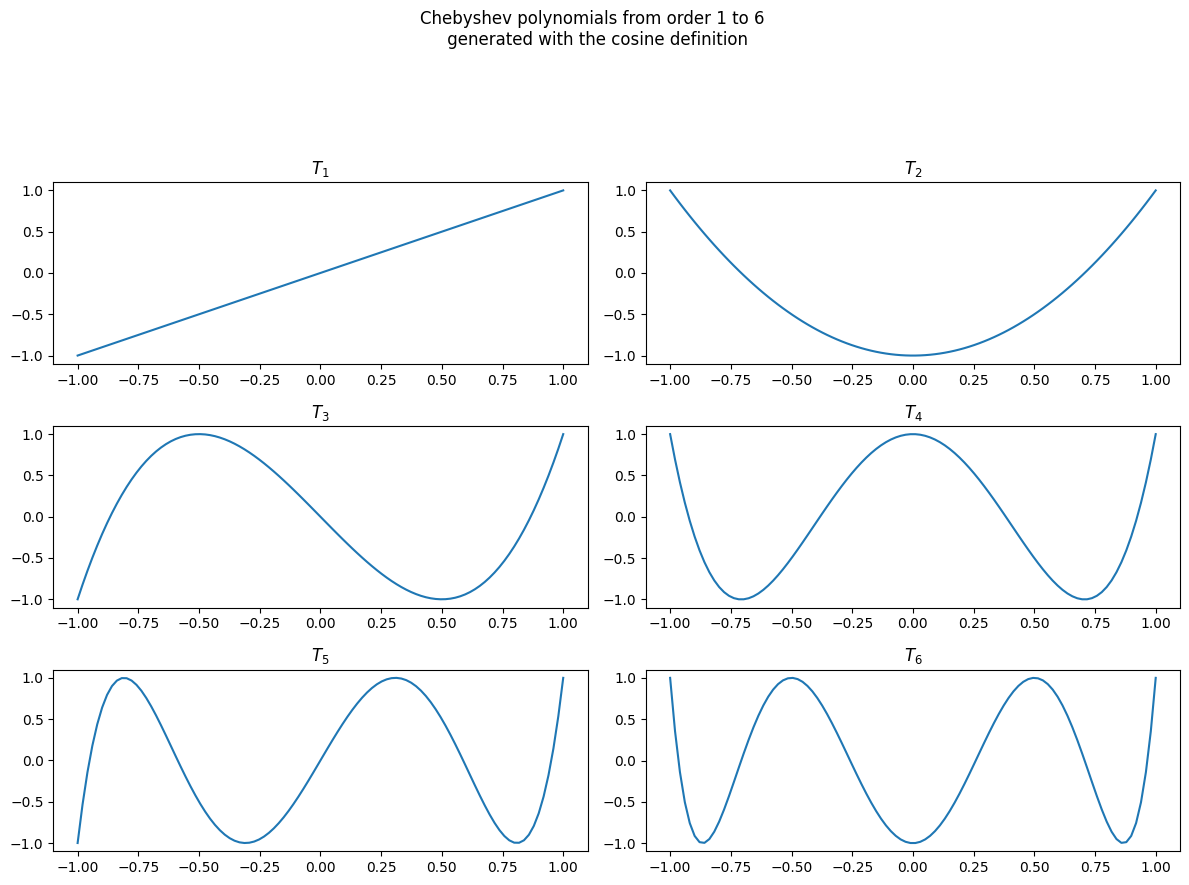

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 1, 100)
theta = np.arccos(x)

t_1 = np.cos(1*theta)
t_2 = np.cos(2*theta)
t_3 = np.cos(3*theta)
t_4 = np.cos(4*theta)
t_5 = np.cos(5*theta)
t_6 = np.cos(6*theta)

fig, axs = plt.subplots(3, 2, figsize=(12, 8))
fig.suptitle('Chebyshev polynomials from order 1 to 6 \n generated with the cosine definition', y=1.1)
axs[0, 0].plot(x, t_1)
axs[0, 0].set_title(r'$T_1$')
axs[0, 1].plot(x, t_2)
axs[0, 1].set_title(r'$T_2$')
axs[1, 0].plot(x, t_3)
axs[1, 0].set_title(r'$T_3$')
axs[1, 1].plot(x, t_4)
axs[1, 1].set_title(r'$T_4$')
axs[2, 0].plot(x, t_5)
axs[2, 0].set_title(r'$T_5$')
axs[2, 1].plot(x, t_6)
axs[2, 1].set_title(r'$T_6$')
fig.tight_layout()
plt.show()

Note the amount of extremes each curve has on the interval
$[-1,1]$,
these are the Chebyshev points, this is important to recall since will help us find a very useful property related to polynomials.

NumPy, of course, has a method to generate the polynomials directly instead of using the _cosine_ definition as seen below.

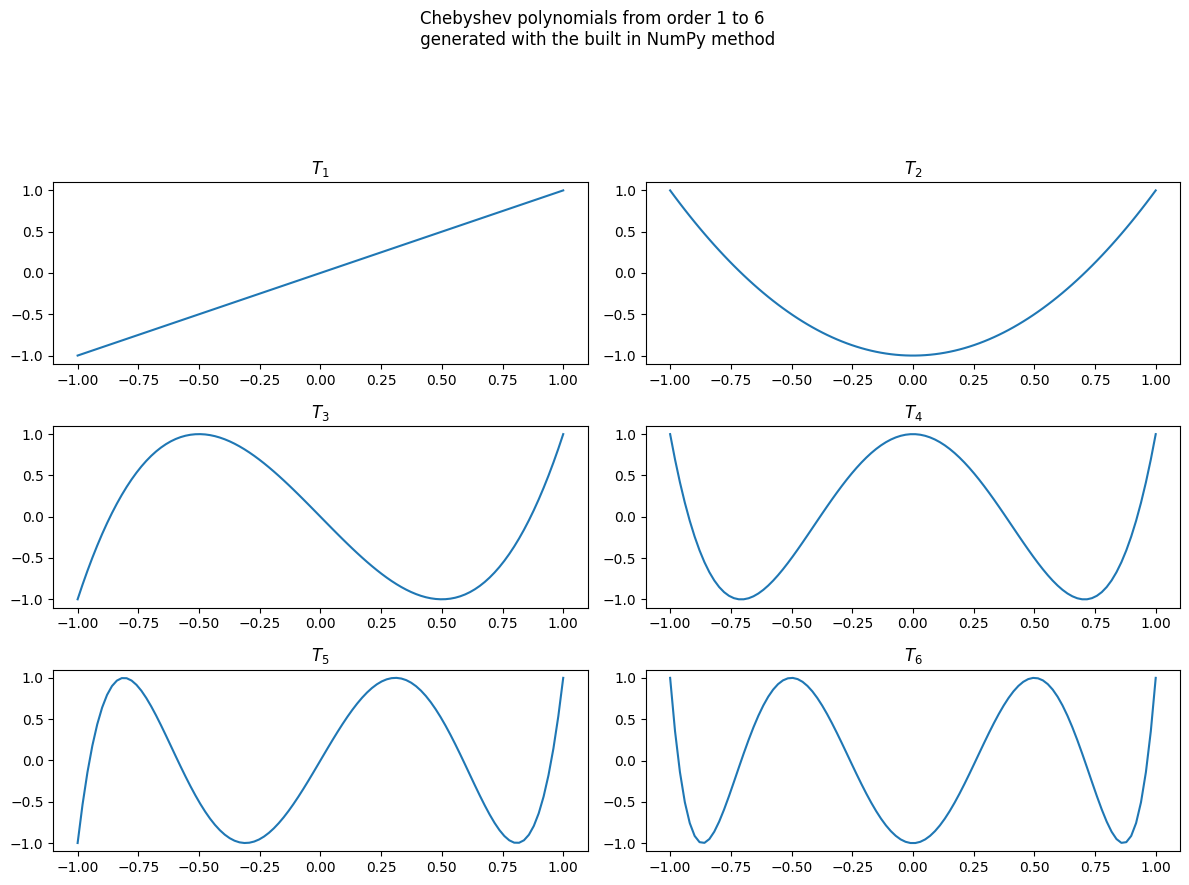

In [2]:
t_1np = np.polynomial.Chebyshev(coef=[0, 1, 0, 0, 0, 0, 0])
t_2np = np.polynomial.Chebyshev(coef=[0, 0, 1, 0, 0, 0, 0])
t_3np = np.polynomial.Chebyshev(coef=[0, 0, 0, 1, 0, 0, 0])
t_4np = np.polynomial.Chebyshev(coef=[0, 0, 0, 0, 1, 0, 0])
t_5np = np.polynomial.Chebyshev(coef=[0, 0, 0, 0, 0, 1, 0])
t_6np = np.polynomial.Chebyshev(coef=[0, 0, 0, 0, 0, 0, 1])

fig, axs = plt.subplots(3, 2, figsize=(12, 8))
fig.suptitle('Chebyshev polynomials from order 1 to 6 \n generated with the built in NumPy method', y=1.1)
axs[0, 0].plot(x, t_1np(x))
axs[0, 0].set_title(r'$T_1$')
axs[0, 1].plot(x, t_2np(x))
axs[0, 1].set_title(r'$T_2$')
axs[1, 0].plot(x, t_3np(x))
axs[1, 0].set_title(r'$T_3$')
axs[1, 1].plot(x, t_4np(x))
axs[1, 1].set_title(r'$T_4$')
axs[2, 0].plot(x, t_5np(x))
axs[2, 0].set_title(r'$T_5$')
axs[2, 1].plot(x, t_6np(x))
axs[2, 1].set_title(r'$T_6$')
fig.tight_layout()
plt.show()

With the main difference that the `numpy.polynomial.Chebyshev` class will create a function that you can then evaluate on `x`.

Note that the way the polynomials are constructed is by giving the coefficients to the class, for instructive purposes here I have given an array of lenght 7 with zeros everywhere except on the position I want the polynomial.
This means that, for instance, a coefficients array
`[1, 0, 3, 2]`
will return the polynomial
$$
p = 1 \times T_0 + 0 \times T_1 + 3 \times T_2 + 2 \times T_3 = T_0 + 3 T_2 + 2 T_3
$$

This, however, still looks a bit esoterical because we haven't actually seen how the polynomials look...let us fix that

In [3]:
t_1np = np.polynomial.chebyshev.cheb2poly(c=[0, 1, 0, 0, 0, 0, 0])
t_2np = np.polynomial.chebyshev.cheb2poly(c=[0, 0, 1, 0, 0, 0, 0])
t_3np = np.polynomial.chebyshev.cheb2poly(c=[0, 0, 0, 1, 0, 0, 0])
t_4np = np.polynomial.chebyshev.cheb2poly(c=[0, 0, 0, 0, 1, 0, 0])
t_5np = np.polynomial.chebyshev.cheb2poly(c=[0, 0, 0, 0, 0, 1, 0])
t_6np = np.polynomial.chebyshev.cheb2poly(c=[0, 0, 0, 0, 0, 0, 1])

print(
    'T1 =', t_1np, '\n',
    'T2 =', t_2np, '\n',
    'T3 =', t_3np, '\n',
    'T4 =', t_4np, '\n',
    'T5 =', t_5np, '\n',
    'T6 =', t_6np
)

T1 = [0. 1.] 
 T2 = [-1.  0.  2.] 
 T3 = [ 0. -3.  0.  4.] 
 T4 = [ 1.  0. -8.  0.  8.] 
 T5 = [  0.   5.   0. -20.   0.  16.] 
 T6 = [ -1.   0.  18.   0. -48.   0.  32.]


We interpret the output above as the coefficients of the polynomials ordered from lower to higher degree, so that we have for instance:
$$
\begin{align*}
T_1(x) &= x \\
T_5(x) &= 5x - 20 x^3 + 16 x^5.
\end{align*}
$$

Familiar an all, we should avoid using the monomial basis for now.
Naturally we can express a polynomial using the Chebysev basis, for instance
$$
x^5 = \frac{5}{80} T_5(x) + \frac{5}{16} T_3(x) + \frac{5}{8} T_1(x).
$$

We can verify this numerically on Python by using the oposite method to what we just used to find the monomial expansion of Chebysev polynomials (`cheb2poly`), namely `poly2cheb`

In [4]:
p = np.polynomial.chebyshev.poly2cheb(pol=[0, 0, 0, 0, 0, 1])

print('x^5 =', p)

x^5 = [0.     0.625  0.     0.3125 0.     0.0625]


Again, recall that Python gives you the coefficient from the lower to the higher order.

Note that the functions
$T_0,...,T_n$
are a basis for the space of polynomials of order
$n$,
$\mathcal{P}_n$.
So that
$p$
can be written as a finite _Chebyshev series_.

In fact, a polynomial
$p$
is determined by its values at Chebyshev points therefore there is a one-to-one linear mapping between values at Chebyshev points and the Chebyshev expansion coefficients.

A sensible question is, what type of functions can have a Chebyshev series?
Not answering the question, but adapting ourselves to the situation, let's consider only
_Lipschitz continuous_ 
functions so we have the following result about this.

If
$f$
is Lipschitz continuous on
$[-1, 1]$,
then it has a unique representation
$$
f(x) = \sum_{k=0}^{\infty} a_k T_k(x)
$$
which is absolutely and uniformly convergent.
The coefficients are given by
$$
a_k = \frac{2}{\pi} \int_{-1}^{1} dx \frac{f(x) T_k(x)}{\sqrt{1 - x^2}}
$$
for
$k>0$
and
$$
a_0 = \frac{1}{\pi} \int_{-1}^{1} dx \frac{f(x) T_0(x)}{\sqrt{1 - x^2}}.
$$

Now, NumPy allows us to create the chebyshev polynomial for a function provided we have the degree of the polynomial we want, whereas Chebfun decides that once the coefficients are smaller than a certain threshold.
I imagine this is because in computational terms it is not really that feasible to just let the program go as they please, so let us inspect the polynomial for the function
$f(x) = e^x$ by analysing as Trefethen does for a more complicated function:

T_0 = 1.266065877752008

T_1 = 1.130318207984970

T_2 = 0.271495339534076

T_3 = 0.044336849848664

T_4 = 0.005474240442093

T_5 = 0.000542926311914

T_6 = 0.000044977322954

T_7 = 0.000003198436462

T_8 = 0.000000199212480

T_9 = 0.000000011036771

T_10 = 0.000000000550588

T_11 = 0.000000000024979

T_12 = 0.000000000001038

T_13 = 0.000000000000039

T_14 = 0.000000000000000

T_15 = -0.000000000000001

T_16 = -0.000000000000002

T_17 = -0.000000000000002

T_18 = -0.000000000000003

T_19 = -0.000000000000002

T_20 = -0.000000000000002

T_21 = -0.000000000000002

T_22 = -0.000000000000003

T_23 = -0.000000000000003

T_24 = -0.000000000000004

T_25 = -0.000000000000003

T_26 = -0.000000000000004

T_27 = -0.000000000000003

T_28 = -0.000000000000004

T_29 = -0.000000000000003

T_30 = -0.000000000000004



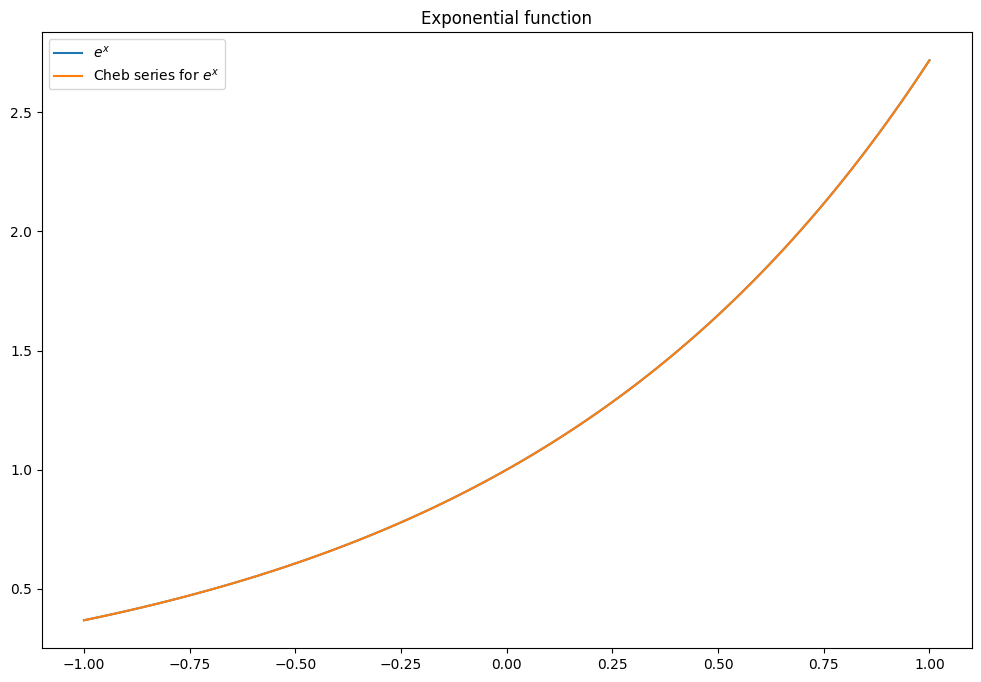

In [5]:
f_exp = lambda x: np.exp(x)
deg = 30 # We get the first 31 coefficients of the series
ec_coeff = np.polynomial.chebyshev.chebinterpolate(f_exp, deg)
# Printing coefficients in a very pretencious way
it = np.nditer(ec_coeff, flags=['f_index'])
for i in it:
    print("T_%d = %.15f\n" % (it.index, ec_coeff[it.index]))

# Plot the polynomial for the function and compare
plt.figure('expcomp', figsize=(12,8))
plt.title('Exponential function')
plt.plot(x, f_exp(x), label=r'$e^x$')
plt.plot(x, np.polynomial.chebyshev.chebval(x, ec_coeff), label=r'Cheb series for $e^x$')
plt.legend()
plt.show()

So...this looks pretty good, doesn't it?
You cannot even see the blue line of the exponential function.
But then also notice that from the 13th coefficient, everything is pretty much zero, let us plot the absolut values of the coefficients

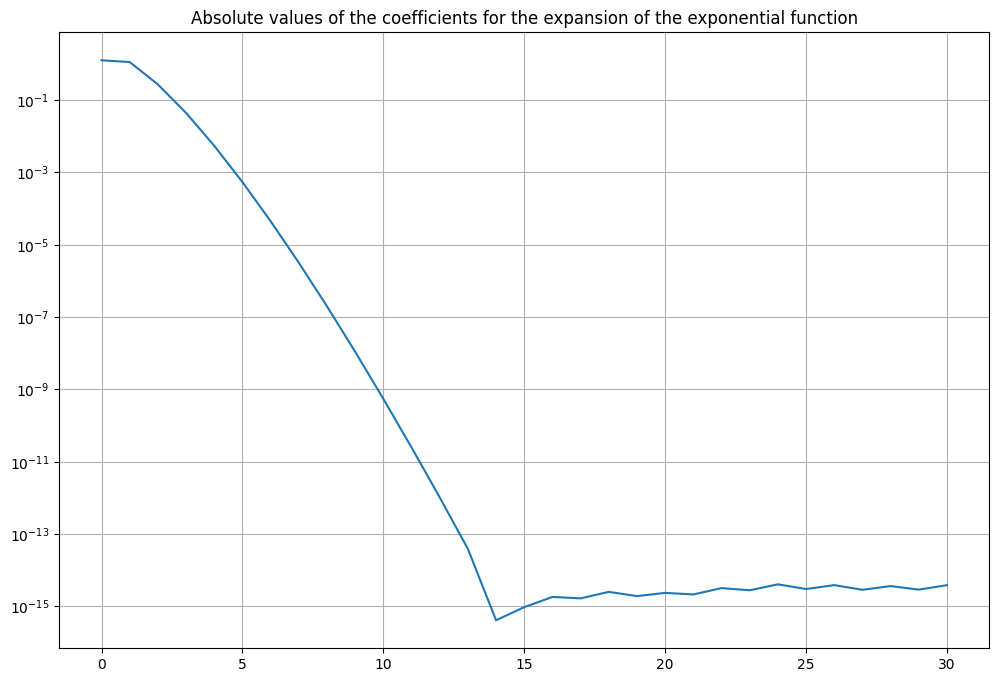

In [6]:
plt.figure('expcoeff', figsize=(12,8))
plt.title('Absolute values of the coefficients for the expansion of the exponential function')
plt.semilogy(np.abs(ec_coeff))
plt.grid()
plt.show()

Here, for the untrained eye probably it might look like everything beyond the 6th coefficient is negligible (this is if you don't plot it on log scale I keep it just to see how it approximate with very few coefficients), in practice we won't be as naive and is probably safe to take everything above
$10^{-15}$
and discard the rest, as done in Chebfun, I am sure they know better than I do.

However it is a good exercise to see what happens if we take only the first 6 and the first 13 coefficients.

First 6 coefficients
T_0 = 1.266065877752008

T_1 = 1.130318207984970

T_2 = 0.271495339534076

T_3 = 0.044336849848664

T_4 = 0.005474240442093

T_5 = 0.000542926311914

Coefficients greater than 10^-15
T_0 = 1.266065877752008

T_1 = 1.130318207984970

T_2 = 0.271495339534076

T_3 = 0.044336849848664

T_4 = 0.005474240442093

T_5 = 0.000542926311914

T_6 = 0.000044977322954

T_7 = 0.000003198436462

T_8 = 0.000000199212480

T_9 = 0.000000011036771

T_10 = 0.000000000550588

T_11 = 0.000000000024979

T_12 = 0.000000000001038

T_13 = 0.000000000000039



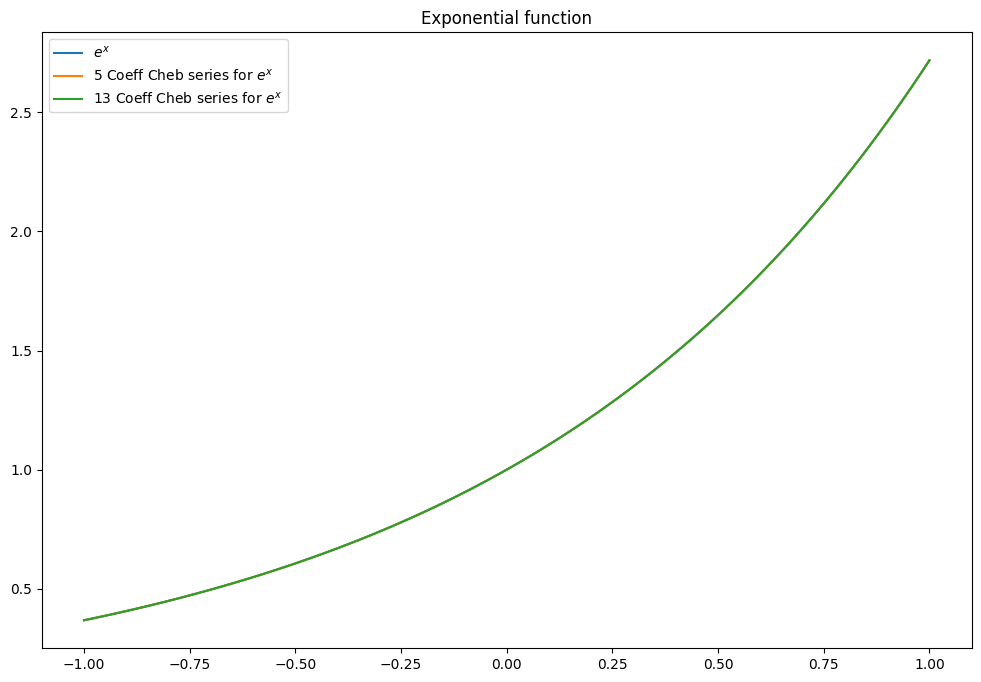

In [7]:
ec_coeff05 = ec_coeff[range(6)]
it05 = np.nditer(ec_coeff05, flags=['f_index'])
print('First 6 coefficients')
for i in it05:
    print("T_%d = %.15f\n" % (it05.index, ec_coeff05[it05.index]))
    
ec_coeff13 = ec_coeff[ec_coeff > 10**(-15)]
print('Coefficients greater than 10^-15')
it13 = np.nditer(ec_coeff13, flags=['f_index'])
for i in it13:
    print("T_%d = %.15f\n" % (it13.index, ec_coeff13[it13.index]))
    
# Plot the polynomial for the function and compare
plt.figure('expcomp', figsize=(12,8))
plt.title('Exponential function')
plt.plot(x, f_exp(x), label=r'$e^x$')
plt.plot(x, np.polynomial.chebyshev.chebval(x, ec_coeff05), label=r'5 Coeff Cheb series for $e^x$')
plt.plot(x, np.polynomial.chebyshev.chebval(x, ec_coeff13), label=r'13 Coeff Cheb series for $e^x$')
plt.legend()
plt.show()

Quite a good fit for both cases 👍

Let us now try the same on a more complicated function

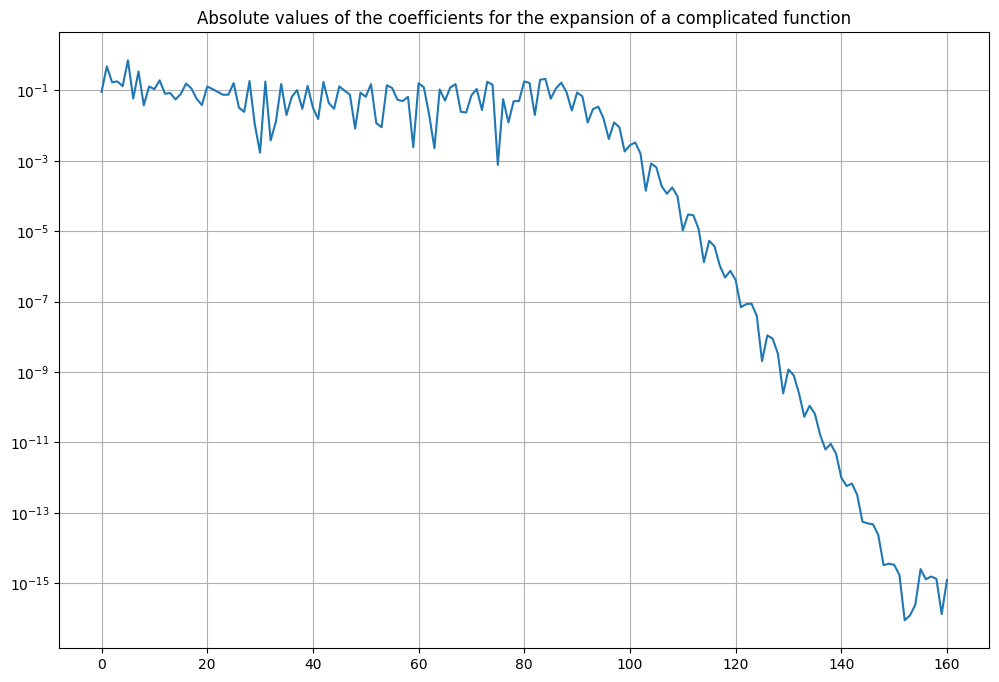

In [8]:
g = lambda x: np.sin(6*x) + np.sin(60*np.exp(x))
deg = 160
g_coeff = np.polynomial.chebyshev.chebinterpolate(g, deg)

plt.figure('expcoeff', figsize=(12,8))
plt.title('Absolute values of the coefficients for the expansion of a complicated function')
plt.semilogy(np.abs(g_coeff))
#plt.yscale('log')
plt.grid()
plt.show()

And then let us plot the function and compare it with the Chebyshev series with 20, 80 and 150 coefficients, abiding by the loose rule of keeping things more or less greater than
$10^{-15}$

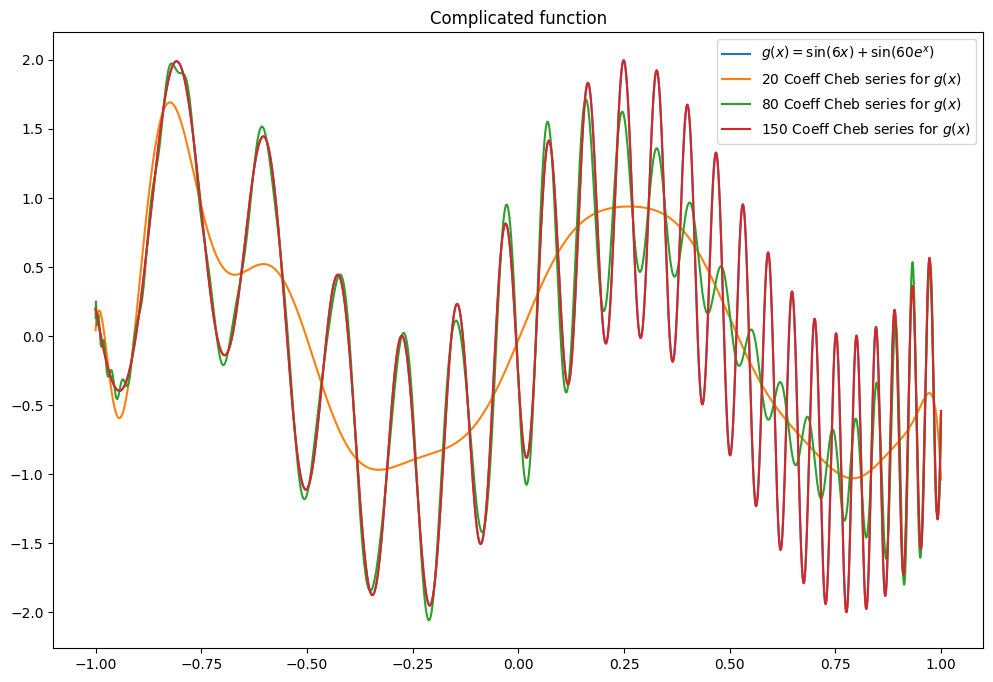

In [9]:
y = np.linspace(-1, 1, 10**4) # More points than before to represent the function better
g_coeff020 = g_coeff[range(20)]
g_coeff080 = g_coeff[range(80)]
g_coeff150 = g_coeff[range(150)]

plt.figure('expcomp', figsize=(12,8))
plt.title('Complicated function')
plt.plot(y, g(y), label=r'$g(x) = \sin(6x) + \sin(60e^x)$')
plt.plot(y, np.polynomial.chebyshev.chebval(y, g_coeff020), label=r'20 Coeff Cheb series for $g(x)$')
plt.plot(y, np.polynomial.chebyshev.chebval(y, g_coeff080), label=r'80 Coeff Cheb series for $g(x)$')
plt.plot(y, np.polynomial.chebyshev.chebval(y, g_coeff150), label=r'150 Coeff Cheb series for $g(x)$')
plt.legend()
plt.show()

Just for reference, you cannot see the blue line because the polynomial with 150 coefficients covers it.

The following is a funciton with two spikes, which in fact looks easier than the function above in terms of its graph
$$
h(x) = \frac{1}{1 + 1000\big(x+\frac{1}{2}\big)^2} + \frac{1}{\sqrt{1 + 1000\big(x-\frac{1}{2}\big)^2}}
$$

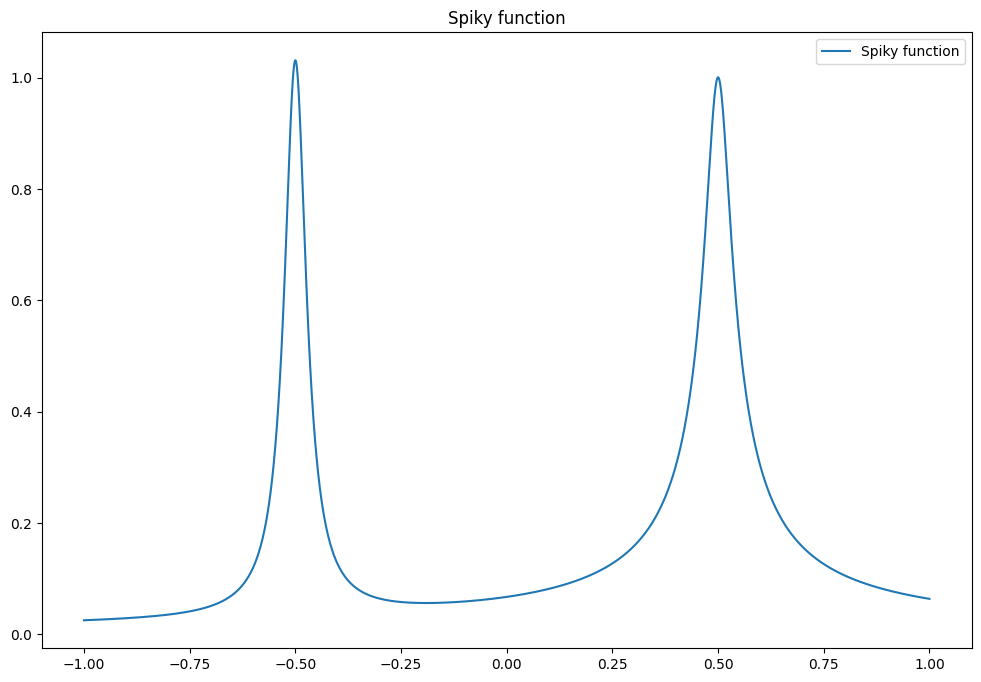

In [17]:
h = lambda x: 1/(1 + 1000*(x + 0.5)**2) + 1/np.sqrt(1 + 1000*(x - 0.5)**2)

plt.figure('spikycomp', figsize=(12,8))
plt.title('Spiky function')
plt.plot(y, h(y), label='Spiky function')
plt.legend()
plt.show()

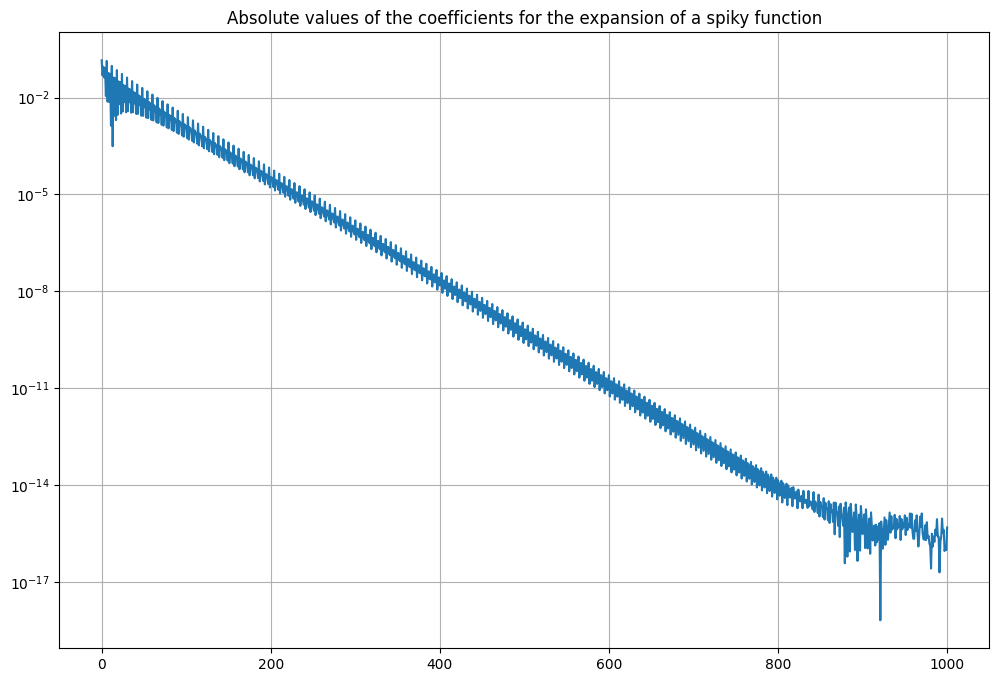

In [18]:
deg = 1000
h_coeff = np.polynomial.chebyshev.chebinterpolate(h, deg)

plt.figure('spikycoeff', figsize=(12,8))
plt.title('Absolute values of the coefficients for the expansion of a spiky function')
plt.semilogy(np.abs(h_coeff))
plt.grid()
plt.show()

Note that if we abide by the rule of taking coefficients larger than $10^{-15}$ then we have to take around 900 coefficients, this is 6 times as many as for the "complicated function" we used before.

Let us consider now a complex function
$$
k(x) = \big(3 + \sin\big(10\pi x\big) + \sin\big(61 e^{0.8\sin(\pi x) + 0.7}\big)\big) e^{i \pi x}
$$

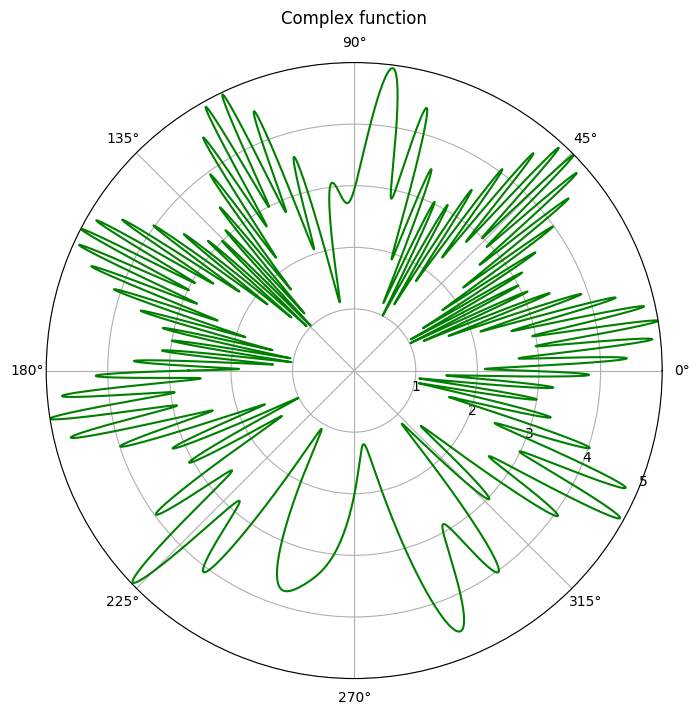

In [43]:
k = lambda x: (3 + np.sin(10*np.pi*x) + np.sin(61*np.exp(0.8*np.sin(np.pi*x) + 0.7)))*np.exp(1j*np.pi*x)

k_eval = k(y) # Evaluate function k
# Polar representation of te values
k_radii = np.abs(k_eval) # Obtain the radii for each value
k_theta = np.angle(k_eval) # Obtain the angles for each value

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(12,8)) # Polar projection
ax.plot(k_theta, k_radii, color='g') # Plot
ax.set_rmax(5) # Maximum value for the radius
#ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)
ax.set_title("Complex function", va='bottom')
plt.show()

Looks complicated, doesn't it?
Well in fact this one does not need as many coefficients when we compute its Chebyshev's approximation, let us have a look at that.

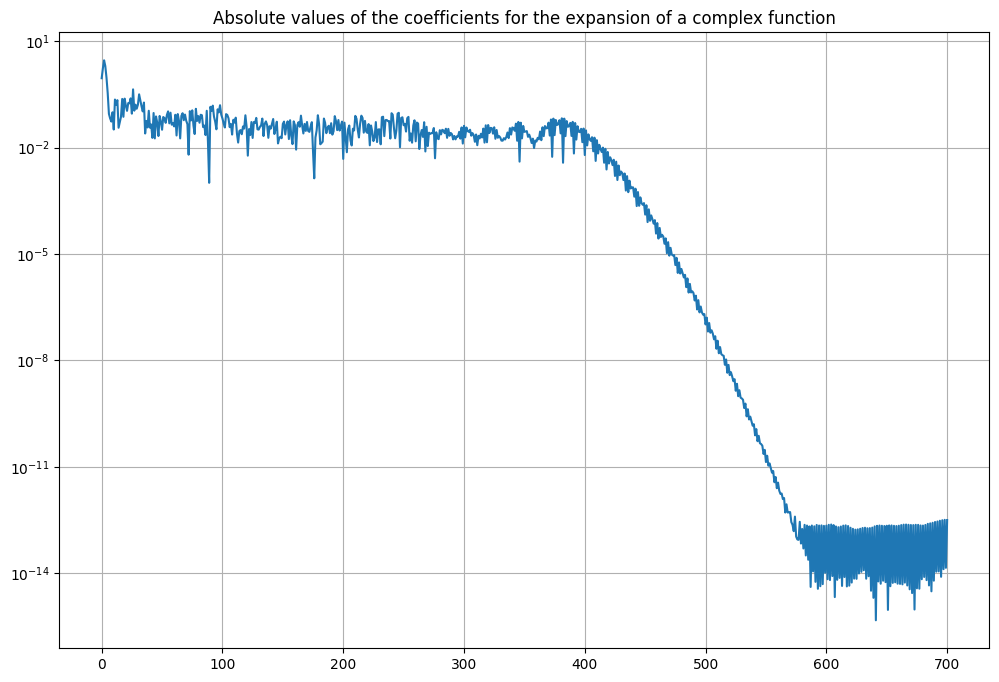

In [47]:
deg = 700
h_coeff = np.polynomial.chebyshev.chebinterpolate(k, deg)

plt.figure('complexcoeff', figsize=(12,8))
plt.title('Absolute values of the coefficients for the expansion of a complex function')
plt.semilogy(np.abs(h_coeff))
plt.grid()
plt.show()

For this one, around 400 coefficients are larger than $10^{-2}$ and suddenly by the 600 something coefficient everything gets quite constant around $10^{-14}$, if we are to find a bigger degree (which you can try doing) you will se that for instance with `deg=15000` the graphs will stay. So it is safe to assume that something around the 600 coefficients is enough.

Why then simple looking functions have way more coefficients than complicated looking ones? Trefethen says it will be discussed in Chapter 8, so let's see how that holds up.